#Graphs and Networks, Probabilty and Markov Processes

In [ ]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.

Text(0.5, 1.0, 'Plot of u  and v with self and all common factors other than 1')

<Figure size 1080x1080 with 0 Axes>

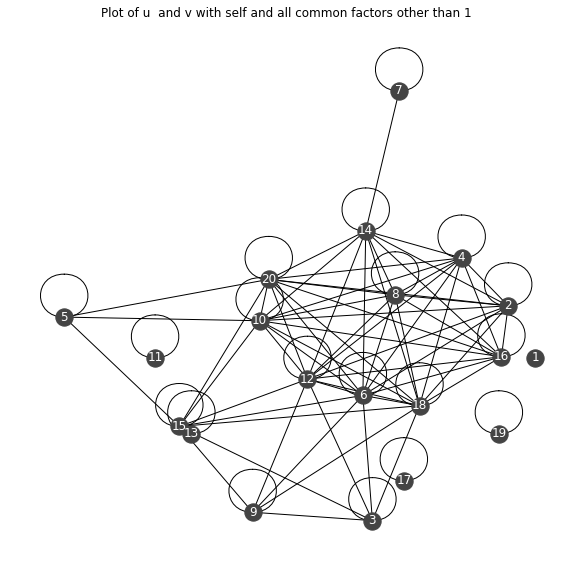

In [ ]:
def com_fact(u , v):
    """
    To get common factors of 2 numbers
    """
    A = []
    for i in range(1, min(u , v)+1): 
        if u%i == v%i == 0: 
            A.append(i)
    return A

def com_fact_1(V):
    """
    To get list of all common factors other than 1 for each inputs 
    """
    B = []
    for i in range(1 , len(V)+1):
        for j in range(1 , len(V)+1):
            if len(com_fact(i,j)) > 1:
                B.append((i,j))
    return B

#Graph parameters
G = nx.Graph()
V = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
G.add_nodes_from(V)
G.add_edges_from(com_fact_1(V))

#Plotting parameters
plt.figure(figsize = (15 , 15))

basic_graph,ax = plt.subplots(1 , 1 , figsize = (10,10))
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
plt.title("Plot of u  and v with self and all common factors other than 1")

## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

2.a) For greatest number of edges for connected bipartite graph with 5 nodes, 
graphs can be formed by node combination of (3,2) and (2,3) and connecting all nodes in both sets. Thus, maximum edges are a*b where a and b are nodes in each sets and we get maximum of 6 edges.

Text(0.5, 1.0, 'Graph H with (2,3) nodes')

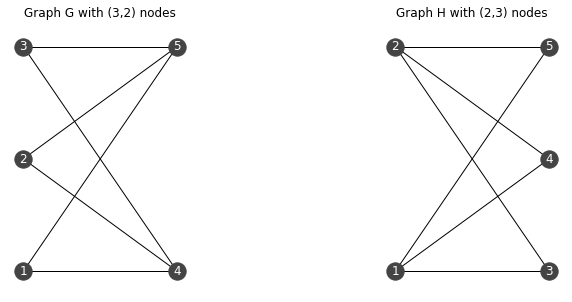

In [ ]:
#2.a) 
#For greatest number of edges for connected bipartite graph with 5 nodes:
#Graphs can be formed by node combination of (3,2),(2,3)

#Graph 1 parameters
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,4),(1,5),(2,4),(2,5),(3,4),(3,5)])

#Graph 2 parameters
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)])

#Plotting parameters
bipartite_graph,ax = plt.subplots(1,2, figsize = (10,5))
nx.draw(G, 
        ax=ax[0], 
        pos=nx.bipartite_layout(G,[1,2,3]),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[0].set_title("Graph G with (3,2) nodes")
plt.subplots_adjust(wspace=1)
nx.draw(H, 
        ax=ax[1], 
        pos=nx.bipartite_layout(H,[1,2]),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[1].set_title("Graph H with (2,3) nodes")

2.b) For least number of edges for connected bipartite graph with 5 nodes, 
graphs can be formed by node combination of (3,2), (2,3), (1,4) or (4,1) and connecting each nodes once in either sets. Thus, minimum edges are 4 in each cases.

Text(0.5, 1.0, 'Graph J with (4,1) nodes')

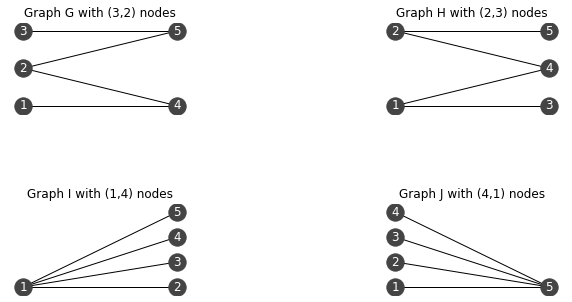

In [ ]:
#2.b) 
#For least number of edges for connected bipartite graph with 5 nodes:
#Graphs can be formed by node combination of (3,2),(2,3),(1,4),(4,1)

#Graph 1 parameters
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,4),(2,4),(2,5),(3,5)])

#Graph 2 parameters
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,3),(1,4),(2,4),(2,5)])

#Graph 3 parameters
I = nx.Graph()
I.add_nodes_from([1,2,3,4,5])
I.add_edges_from([(1,2),(1,3),(1,4),(1,5)])

#Graph 4 parameters
J = nx.Graph()
J.add_nodes_from([1,2,3,4,5])
J.add_edges_from([(1,5),(2,5),(3,5),(4,5)])

#Plotting parameters
bipartite_graph,ax = plt.subplots(2,2, figsize = (10,5))
nx.draw(G, 
        ax=ax[0][0], 
        pos=nx.bipartite_layout(G,[1,2,3]),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[0][0].set_title("Graph G with (3,2) nodes")
plt.subplots_adjust(wspace=1)
nx.draw(H,
        ax=ax[0][1], 
        pos=nx.bipartite_layout(H,[1,2]),
        with_labels=True,
        node_color='#444444',
        font_color="white")
ax[0][1].set_title("Graph H with (2,3) nodes")
plt.subplots_adjust(hspace=1)
nx.draw(I,
        ax=ax[1][0],
        pos=nx.bipartite_layout(I,[1]),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[1][0].set_title("Graph I with (1,4) nodes")
nx.draw(J,
        ax=ax[1][1], 
        pos=nx.bipartite_layout(J,[1, 2,3,4]),
        with_labels=True, 
        node_color='#444444',
        font_color="white")
ax[1][1].set_title("Graph J with (4,1) nodes")

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

In [ ]:
P = [] #Initialize matrix for storing probability
A = [] #Initialize matrix for storing list of values
L = [] #Initialize matrix for storing laplacian values  
E = [] #Initialize matrix for storing eigen values

#Loop for getting values, probabilities, laplacian and eigenvalues
for i in range(0,100):
    n = 10
    p = (i+1)/100.0
    P.append(p)
    A.append(nx.fast_gnp_random_graph(n,p))
    L.append(nx.laplacian_matrix(A[i]).todense())
    E.append(np.linalg.eigvals(L[i]))

#Plotting parameters
fig = plt.figure(figsize = (100,200))
for i in range(0,100):
    fig.add_subplot(20,5,i+1)
    plt.plot(E[i].real, 'o', color= 'r', label = P[i])
    plt.title(P[(i)])
    plt.legend()
plt.xlabel("Eigen values")
plt.ylabel("$p$")

Text(0, 0.5, '$p$')


-->The highest value of the eigenvalues of a graph increases as probability p increases. 

-->For completely connected graph, the eigenvalues of the Laplacian equals the number of nodes in the graph.

## 4. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

A) As per the given condition that 1 comes twice and as total probability will be 1, then- 

=)P(E)= P(1)+P(2)+P(3)+P(4)+P(5)+P(6)= 2x + x + x + x + x + x = 1 (Probability of 1 coming twice and other digits once)

=)7x = 1 =) x = $\frac{1}{7}$

=)Probability of 1 = $\frac{2}{7}$ and for other digits = $\frac{1}{7}$

------------------------------------------------------------------------------------------------------------------------------------
4.a) For probability of getting a sum of seven, we have the following occurences- (1,6),(2,5),(3,4),(4,3),(5,2),(6,1). Now, we observe there are 2 occurences where 1 comes out, so we divide the occurences into 2 parts, as-

=)P(E1)= 2x(Probability of 1 for any one die and other digits for other die)+4x(Probability of other digits except 1 for 1st and 2nd dice)

=)P(E1) = 2x($\frac{2}{7}$x$\frac{1}{7}$)+4x($\frac{1}{7}$x$\frac{1}{7}$)

=)P(E1) = $\frac{4}{49}$+$\frac{4}{49}$

=)P(E1) = $\frac{8}{49}$

------------------------------------------------------------------------------------------------------------------------------------

4.b) As 1st die comes 1, then there is only possibility for 2nd die, i.e. 6, so that sum is seven. Hence, the probability is-

=)P(E2) = (Probability of die 1 showing 1)x(Probability of die  showing 6)

=)P(E2) = $\frac{2}{7}$x$\frac{1}{7}$

=)P(E2) = $\frac{2}{49}$

------------------------------------------------------------------------------------------------------------------------------------

4.c) Total combination for 2 dice without 1 = 5x5 = 25

=) P(E3) = 25 x ((Probability of digits other than 1 for 1st die)x(Probability of digits other than 1 for 2nd die)

=)P(E3) = 25 x $\frac{1}{7}$ x $\frac{1}{7}$

=)P(E3) = $\frac{25}{49}$

4.d)PDF calculation tables-

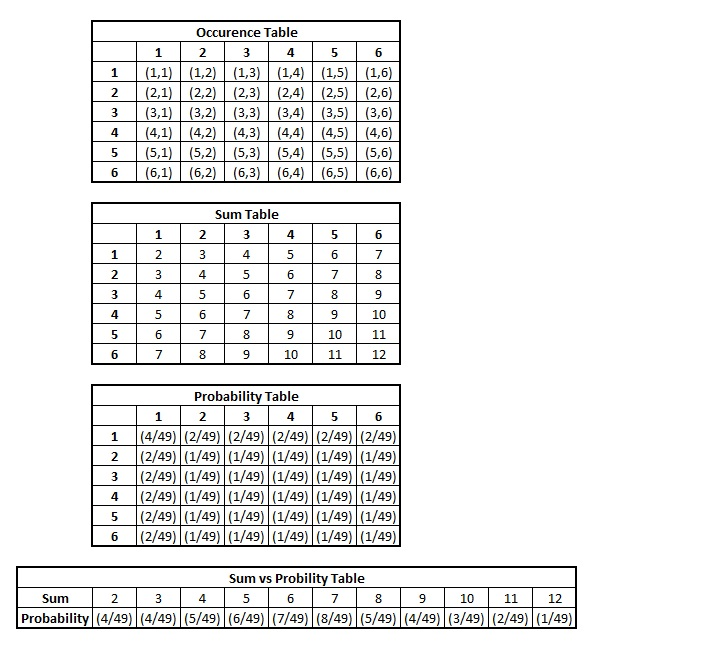

Text(0, 0.5, 'Probability')

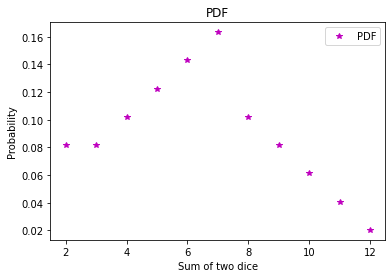

In [ ]:
#Plotting PDF
x = np.array([2,3,4,5,6,7,8,9,10,11,12])
PDF = np.array([4,4,5,6,7,8,5,4,3,2,1]) / 49;
plt.plot(x, PDF, "*", color='m', label="PDF")
plt.legend();
plt.title("PDF");
plt.xlabel("Sum of two dice")
plt.ylabel("Probability")

## 5. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

5.a) For $0 \leq x \leq 1 $, the CDF is defined by,

$F_X(x) = \int_{0}^{x} f_x(x) dx = \int_{0}^{x} 1 dx = \left|x\right|_0^x = x$

$
CDF\;of\;f_x(x) = \left \{
\begin{array}{ll}
x, & \mathrm{if}\;0 \leq x \leq 1 \\
0, & \mathrm{otherwise}. 
\end{array}
\right .
$

------------------------------------------------------------------------------------------------------------------------------------

5.b) As $Y = X^2$, thus, $f_Y = x^2$ 

And the CDF of $f_Y$, ie $F_Y(x) =  \int_{-\infty}^{\infty} x^2 dx $

For  $ 0 \leq x \leq 1 $,

$F_Y(x) =  \int_{0}^{x} x^2 dx =  \left|\frac{x^3}{3}\right|_{0}^{x} =  \frac{x^3}{3}  $

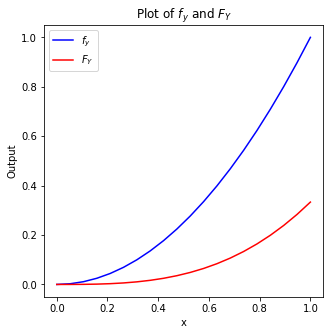

In [ ]:
#5.b) Plot
#Defining inputs
x = np.linspace(0, 1 , 20)
y = x**2
Y = (x**3)/3

#Plotting parameters
fig = plt.figure(figsize = (5,5))
plt.plot(x,y, color = 'b', label = '$f_y$' )
plt.plot(x,Y, color = 'r', label = '$F_Y$' )
plt.title('Plot of $f_y$ and $F_Y$')
plt.xlabel('x')
plt.ylabel('Output')
plt.legend();

## 6. Markov Process Properties

Consider the following three Markov Processes.
![HW-MPs.jpg](attachment:HW-MPs.jpg)

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

####For Process a)

i) All are aperiodic as they are bi-directional

ii) None are transient. All are recurrent.

iii) No absorbing states and subsets of states.

iv) All states are ergodic.

---------------------------------------------------------------------------------------------------------------------------
####For Process b)

i) All are aperiodic as there is a self loop in 3

ii) None are transient. All are recurrent. 

iii) No absorbing states and subsets of states.

iv) All states are ergodic.

----------------------------------------------------------------------------------------------------------------------------
####For Process c)

i) State 0 is aperiodic.
All other states- 1,2,3,4,5,6 have period 2.

ii) State 0 is in transient state. All other states are recurrent.

iii) No absorbing states but sets {1,2}, {3,4}, {5,6} are absorbing.

iv) No states are ergodic.

## 7. Stationary Distributions

For each Markov Process in Problem 6:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).

7.i) 
###Update Matrices-
####For Process a)-
$
Q_a = \begin{pmatrix}
0 & 0.5 & 0.5 \\
0.5 & 0 & 0.5 \\
0.5 & 0.5 & 0
\end{pmatrix} .
$

####For Process b)-
$
Q_b = \begin{pmatrix}
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0.5 & 0 & 0 & 0.5\\
\end{pmatrix} .
$

####For Process c)-
$
Q_c = \begin{pmatrix}
0 & 0.5 & 0 & 0.25 & 0 & 0.25 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix} .
$

Text(0.5, 1.0, 'Process c) State-i vs Time-k')

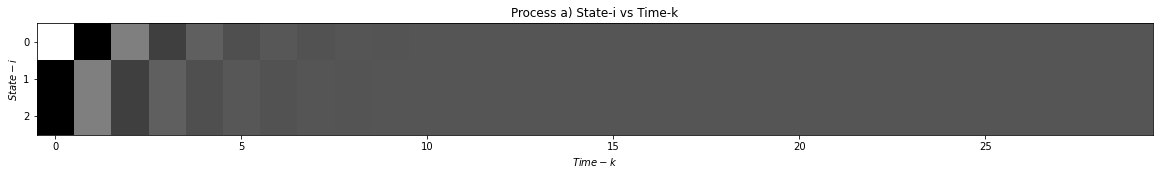

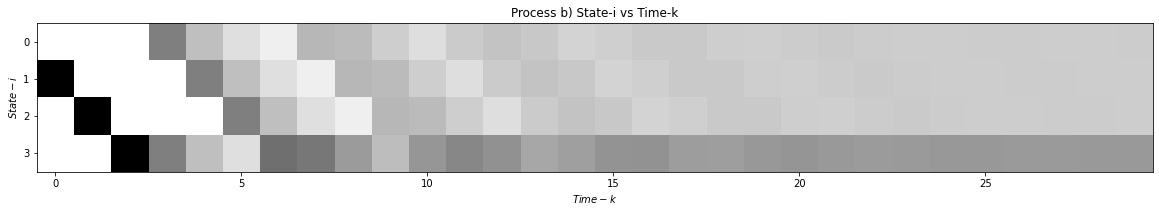

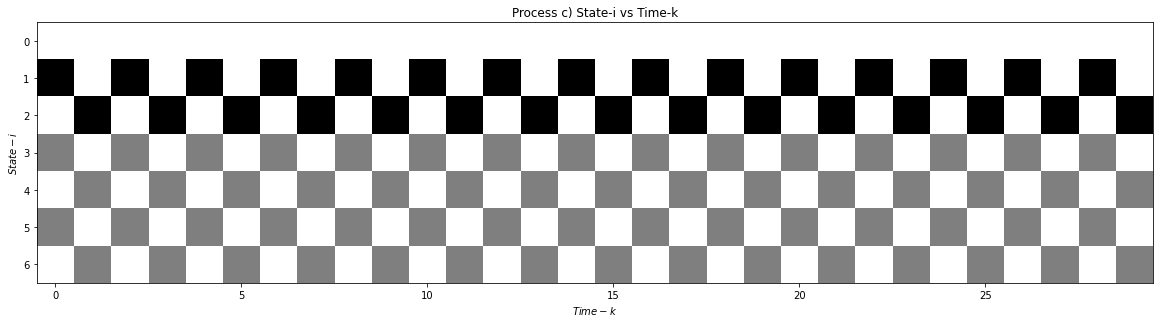

In [ ]:
#7.ii)
#Process a) Transition probability matrix
Q_a = np.array([[0,0.5,0.5],
                 [0.5,0,0.5],
                 [0.5,0.5,0]], dtype = float)

#Process b) Transition probability matrix
Q_b = np.array([[0,1,0,0],
                 [0,0,1,0],
                 [0,0,0,1],
                 [0.5,0,0,0.5]], dtype = float)

#Process c) Transition probability matrix
Q_c = np.array([[0,0.5,0,0.25,0,0.25,0],
                [0,0,1,0,0,0,0],
                [0,1,0,0,0,0,0],
                [0,0,0,0,1,0,0],
                [0,0,0,1,0,0,0],
                [0,0,0,0,0,0,1],
                [0,0,0,0,0,1,0]], dtype = float)

def dynamic(num, Q):
    """
    To simulate dynamics pk+1=pkQ  
    num = Number of iterations
    Q = Transition probability matrix
    """
    p = np.zeros(Q.shape[0])
    M = []
    p[0] = 1
    for _ in range(num):
        p = p.dot(Q)
        M.append(p)
    return M

def plot_2D(k,i):
    """
    To plot a 2D grid where grid point  (k,i)  is a gray-scale square 
    corresponding to the probability that the process is in state i at time k   
    """
    x = dynamic(k,i)
    x = np.array(x).T
    fig,ax = plt.subplots(1,1, figsize = (20,10))
    ax.imshow(x , cmap = 'gray_r')
    ax.set_xlabel('$Time-k$')
    ax.set_ylabel('$State-i$')
        
#Plotting
n = 30

plot_2D(n, Q_a)
plt.title('Process a) State-i vs Time-k')

plot_2D(n, Q_b)
plt.title('Process b) State-i vs Time-k')

plot_2D(n, Q_c)
plt.title('Process c) State-i vs Time-k')